In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten

In [3]:
### Partie A - Création des données
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [11]:
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()

N = X_train_data.shape[0] # 60 000 données

X_train = np.reshape(X_train_data, (N,28,28,1))
X_test = np.reshape(X_test_data, (X_test_data.shape[0],28,28,1))

X_train = X_train/255 # normalisation
X_test = X_test/255

Y_train = to_categorical(Y_train_data, num_classes=10)
Y_test = to_categorical(Y_test_data, num_classes=10)

In [12]:
### Partie B - Réseau de neurones
modele = Sequential()

# Première couche de convolution : 32 neurones, motif 3x3, activ. relu
modele.add(Conv2D(32, kernel_size=3, padding='same', activation='relu', input_shape=(28,28,1)))

# Deuxième couche de convolution : 16 neurones
modele.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))

# Aplatissage
modele.add(Flatten())

# Couche de sortie : 1O neurones
modele.add(Dense(10, activation='softmax'))

# Descente de gradient
modele.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(modele.summary())

# Calcul des poids
modele.fit(X_train, Y_train, batch_size=32, epochs=5)

/home/local/o22202319/mod/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-01-08 11:20:29.220101: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 28, 28, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │       125,450 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,394 (509.35 KB)

 Trainable params: 130,394 (509.35 KB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9096 - loss: 0.3060
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9828 - loss: 0.0565
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9885 - loss: 0.0371
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9918 - loss: 0.0249
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9947 - loss: 0.0153


In [13]:
### Partie C - Résultats
score = modele.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.04717158526182175
Test accuracy: 0.9865000247955322


In [14]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [15]:
# Partie A. Données
from tensorflow.keras.datasets import cifar10

In [16]:
(X_train_data, Y_train_data), (X_test_data, Y_test_data) = cifar10.load_data()

num_classes = 10
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

Y_train = keras.utils.to_categorical(Y_train_data, num_classes)
Y_test = keras.utils.to_categorical(Y_test_data, num_classes)

X_train = X_train_data.astype('float32')
X_test = X_test_data.astype('float32')

X_train = X_train/255
X_test = X_test/255

print(X_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 49s 0us/step
(50000, 32, 32, 3)


In [22]:
# Partie B. Réseau
modele = Sequential()

# Première couche de convolution : 64 neurones, convolution 3x3, activation relu
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(32,32,3)))

# Deuxième couche de convolution : 64 neurones
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Mise en commun (pomodele.add(MaxPooling2D(pool_size=(2, 2)))
# Quatrième couche de convolution : 64 neurones
modele.add(Conv2D(64, kernel_size=3, padding='same', activation='relu'))

# Mise en commun (pooling)
modele.add(MaxPooling2D(pool_size=(2, 2)))

# Aplatissage
modele.add(Flatten())

# Couche de sortie : 1O neurones
modele.add(Dense(10, activation='softmax'))

# Méthode de gradient
modele.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Affiche un résumé
modele.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16384)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │       163,850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 239,498 (935.54 KB)

 Trainable params: 239,498 (935.54 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
# Partie C. Apprentissage
modele.fit(X_train, Y_train, epochs=20, batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.9353 - loss: 0.1860
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9453 - loss: 0.1530
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9483 - loss: 0.1445
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9552 - loss: 0.1239
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9592 - loss: 0.1164
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9600 - loss: 0.1115
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.9621 - loss: 0.1027
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 28ms/step - accuracy: 0.9629 - loss: 0.1059
Epoch 9/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.9694 - loss: 0.0867
Epoch 10/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.9695 - loss: 0.0848
Epoch 11/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.9681 - loss: 0.0901
Epoch 12

KeyboardInterrupt: 

Test erreur (loss) : 3.411098003387451
Test précision (accuracy) : 0.6492000222206116
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


/tmp/ipykernel_39761/3578862127.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title('Attendu %d - Prédit %d (%d%%)'% (Y_test_data[i],rang_max,perc_max))


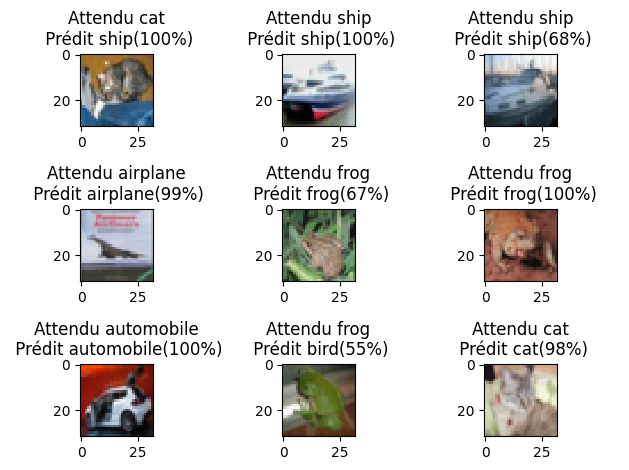

In [26]:
# Partie D. Résultats et visualisation
score = modele.evaluate(X_test, Y_test, verbose=0)
print('Test erreur (loss) :', score[0])
print('Test précision (accuracy) :', score[1])
Y_predict = modele.predict(X_test)

def affiche_images_test(debut):
    plt.axis('off')
    for i in range(9):
        plt.subplot(330 + 1 + i)
        image_predite = Y_predict[i]
        perc_max = int(round(100*np.max(image_predite)))
        rang_max = np.argmax(image_predite)
        titre = 'Attendu '+ labels[Y_test_data[i][0]] + '\n Prédit '+ labels[rang_max] + '('+ str(perc_max) + '%)'
        plt.title('Attendu %d - Prédit %d (%d%%)'% (Y_test_data[i],rang_max,perc_max))
        plt.title(titre)
        plt.imshow(X_test_data[i], interpolation='nearest')
    plt.tight_layout()
    # plt.savefig('tfconv-images-test.png')
    plt.show()
    return
affiche_images_test(0)